In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
# Menampilkan persentase missing value per kolom
missing_percentage = (missing_values / len(df)) * 100
print("Persentase missing value per kolom:")
print(missing_percentage)

Persentase missing value per kolom:
hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_weekdays_nights           0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
city                               0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.686

In [14]:
# DRop Columns Missing Value 90%
delete = ['company']
df = df.drop(delete, axis=1)

In [15]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0


In [16]:
df['children'].fillna(0, inplace= True)
df['city'].fillna(df['city'].mode()[0], inplace= True)
df['agent'].fillna(0, inplace= True)

# Handling Invalid Values

In [17]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [18]:
df['meal'].replace('Undefined','No Meal',inplace=True)

# Handling Unnecessary Data

In [19]:
df['Total Customer'] = df['adults'] + df['children'] + df['babies']
df = df.drop(df[df['Total Customer'] == 0].index)

# Handling Type Data

In [20]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')

# Exploratory Data Analysis

**Monthly Hotel Booking Analysis Based on Hotel Type**

In [21]:
def month_name_to_number(df, month_col):
  month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  month_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

  df[month_col] = df[month_col].map(lambda x: month_numbers[month_names.index(x)])

  return df

def number_to_month(df, month_col):
  month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  month_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

  df[month_col] = df[month_col].map(lambda x: month_names[month_numbers.index(x)])

  return df

In [22]:
x = df.groupby(['hotel','arrival_date_year','arrival_date_month']).aggregate({'is_canceled':'count'}).rename(columns={'is_canceled':'total'}).reset_index()
x = month_name_to_number(x, 'arrival_date_month').sort_values(['hotel','arrival_date_year','arrival_date_month'])
x = number_to_month(x, 'arrival_date_month')
x

,hotel,arrival_date_year,arrival_date_month,total
2,City Hotel,2017,January,1233
1,City Hotel,2017,February,1649
5,City Hotel,2017,September,1396
4,City Hotel,2017,October,2474
3,City Hotel,2017,November,3524
0,City Hotel,2017,December,3382
10,City Hotel,2018,January,3103
9,City Hotel,2018,February,2465
13,City Hotel,2018,March,1364
6,City Hotel,2018,April,2365


In [23]:
df['arrival_date_year'] = df['arrival_date_year'].replace(2019,2017)

dfg = df.groupby(['hotel','arrival_date_month','arrival_date_year']).aggregate({'Total Customer' : 'count'}).reset_index()

dfg = dfg.groupby(['hotel','arrival_date_month']).aggregate({'Total Customer' : 'mean'}).reset_index()


dfg = month_name_to_number(dfg, 'arrival_date_month').sort_values(['hotel','arrival_date_month'])
dfg = number_to_month(dfg, 'arrival_date_month')
dfg

,hotel,arrival_date_month,Total Customer
4,City Hotel,January,2168.0
3,City Hotel,February,2057.0
7,City Hotel,March,1865.0
0,City Hotel,April,2475.0
8,City Hotel,May,3217.0
6,City Hotel,June,3734.5
5,City Hotel,July,4110.5
1,City Hotel,August,3942.5
11,City Hotel,September,4035.5
10,City Hotel,October,4483.5


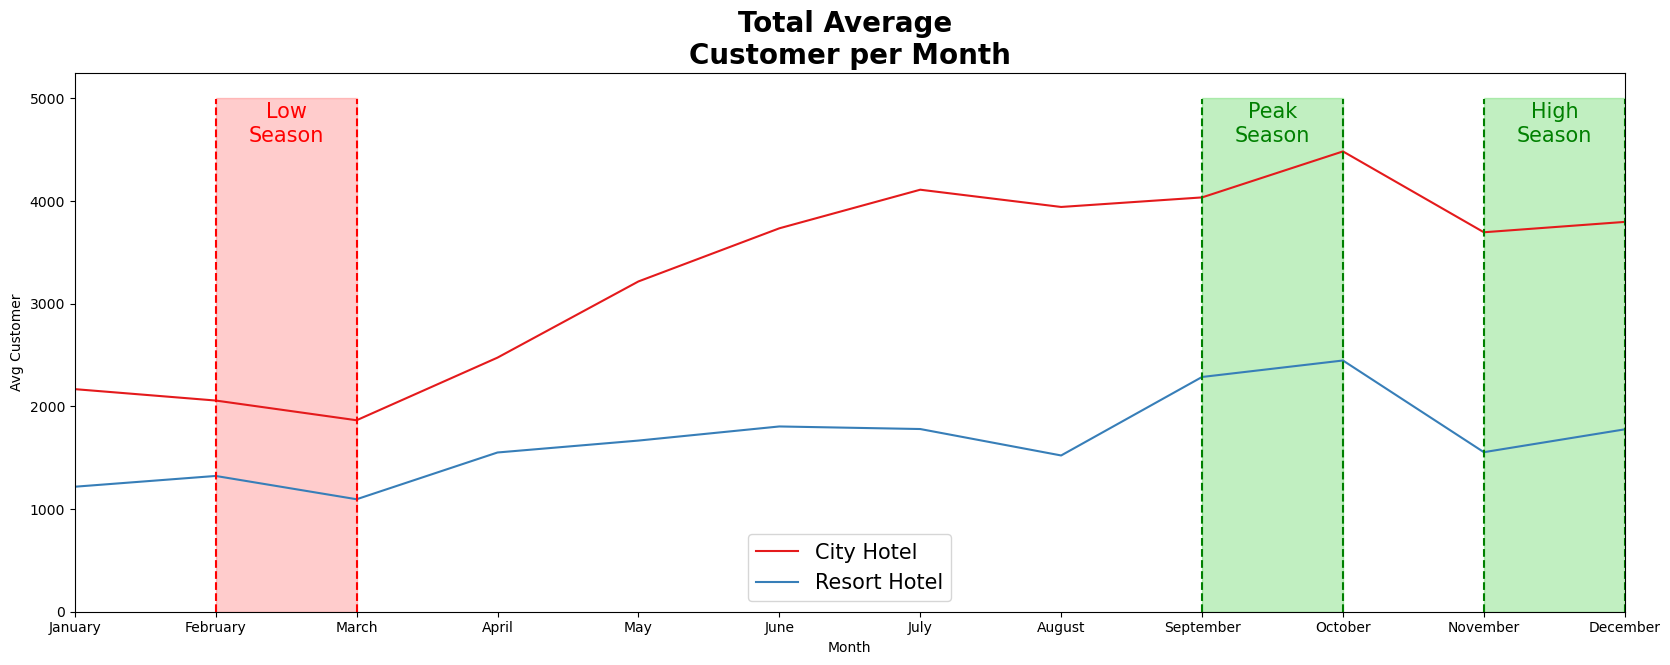

In [25]:
plt.figure(figsize=(20,7))
sns.lineplot(data = dfg, x = 'arrival_date_month', y = 'Total Customer', hue = 'hotel', palette='Set1')
plt.title('Total Average \nCustomer per Month', weight='bold', fontsize = 20)
plt.ylabel('Avg Customer')
plt.xlabel('Month')

plt.axvline(8, color='green', linestyle='--',ymax = 0.952, ymin = 0)
plt.axvline(9, color='green', linestyle='--',ymax = 0.952, ymin = 0)
plt.stackplot(np.arange(8,10), [5000], color='limegreen', alpha=0.3)
plt.text(x = 8.5, y = 4750, s = 'Peak\nSeason', va = 'center', ha = 'center', fontsize =15, color='green')

plt.axvline(10, color='green', linestyle='--',ymax = 0.952, ymin = 0)
plt.axvline(11, color='green', linestyle='--',ymax = 0.952, ymin = 0)
plt.stackplot(np.arange(10,12), [5000], color='limegreen', alpha=0.3)
plt.text(x = 10.5, y = 4750, s = 'High\nSeason', va = 'center', ha = 'center', fontsize =15, color='green')

plt.axvline(1, color='red', linestyle='--', ymax = 0.952, ymin = 0)
plt.axvline(2, color='red', linestyle='--', ymax = 0.952, ymin = 0)
plt.stackplot(np.arange(1,3), [5000], color='red', alpha=0.2)
plt.text(x = 1.5, y = 4750, s = 'Low\nSeason', va = 'center', ha = 'center', fontsize =15, color='red')

plt.xlim(0,11)
plt.legend(loc='best', fontsize =15)
plt.show()

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

C:\Users\DimasRN\AppData\Local\Temp\ipykernel_21196\1796045616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Stay_Duration'])


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

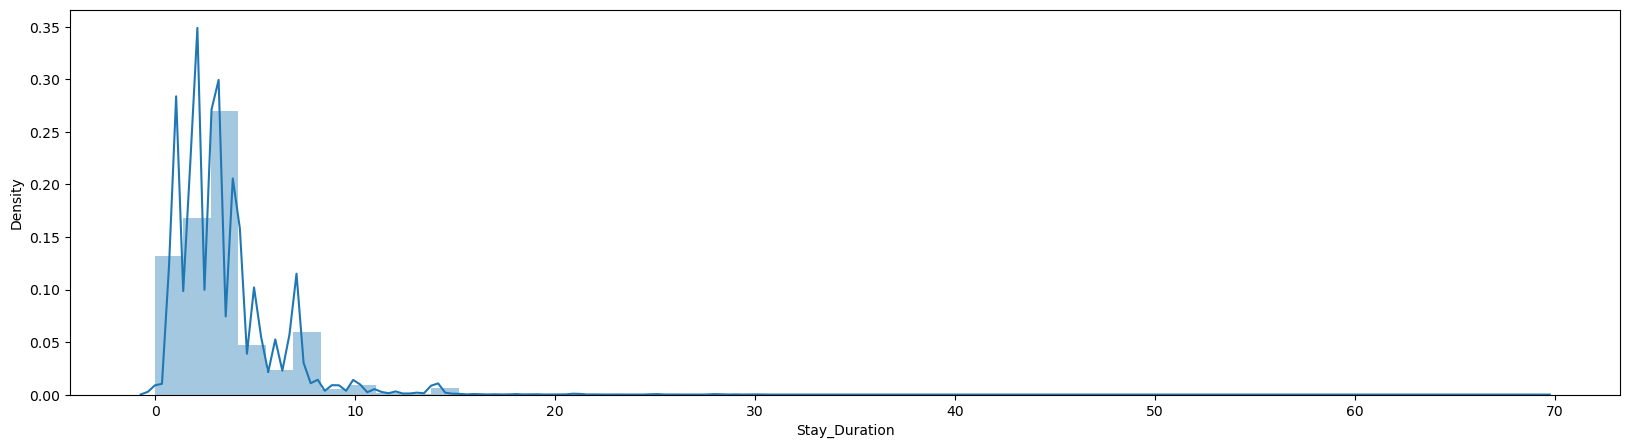

In [26]:
df['Stay_Duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
plt.figure(figsize=(20,5))
sns.distplot(df['Stay_Duration'])
plt.plot


In [28]:
df['Duration'] = df['Stay_Duration'].apply(lambda value: 'A days' if value < 3 else ('A weeks' if value < 7 else ('A months' if value < 30 else 'Several months')))


In [29]:
df['Duration'].value_counts()

A weeks           56054
A days            49282
A months          13840
Several months       34
Name: Duration, dtype: int64

In [30]:
dfg_cancel = df[df['is_canceled'] == 1].groupby(['hotel','Duration']).aggregate({'is_canceled' : 'count'}).reset_index()
dfg_aman = df[df['is_canceled'] == 0].groupby(['hotel','Duration']).aggregate({'is_canceled' : 'count'}).reset_index()
dfg_cancel['cancel_ratio'] = dfg_cancel['is_canceled'] / (dfg_cancel['is_canceled'] + dfg_aman['is_canceled']) * 100
dfg_cancel

,hotel,Duration,is_canceled,cancel_ratio
0,City Hotel,A days,14548,41.640667
1,City Hotel,A months,1473,45.156346
2,City Hotel,A weeks,17048,41.629224
3,City Hotel,Several months,10,83.333333
4,Resort Hotel,A days,2907,20.264901
5,Resort Hotel,A months,3358,31.745131
6,Resort Hotel,A weeks,4849,32.108330
7,Resort Hotel,Several months,6,27.272727


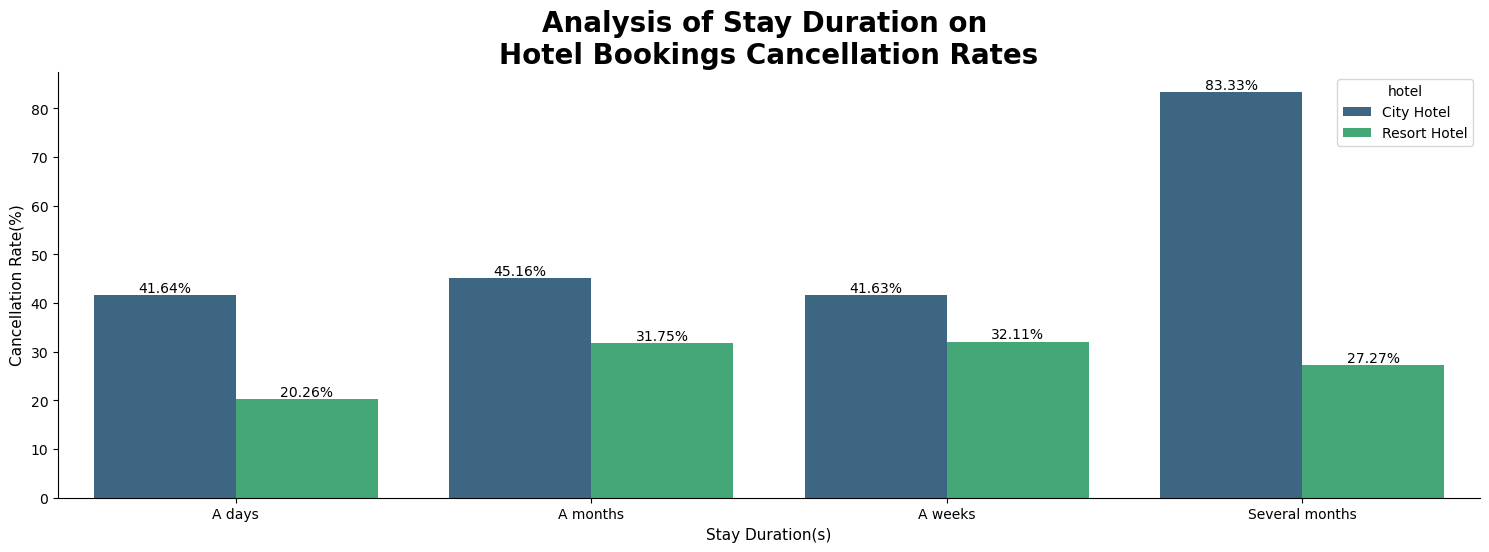

In [31]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Duration', y='cancel_ratio', hue='hotel', data=dfg_cancel, palette='viridis')

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

sns.despine()
plt.tight_layout()

# Menambahkan label pada setiap bar

plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[1], fmt='%.2f%%')
plt.title('Analysis of Stay Duration on \nHotel Bookings Cancellation Rates', weight='bold', fontsize = 20)
plt.show()

Terlihat bahwa tingkat pembatalan lebih tinggi pada durasi menginap yang pendek, terutama kurang dari 10 hari. <br>
Hal ini menunjukkan bahwa pelanggan cenderung lebih mungkin membatalkan pemesanan jika mereka hanya menginap dalam waktu singkat.<br>
Mungkin ada beberapa faktor yang menyebabkan pembatalan, seperti perubahan rencana perjalanan atau ketidaknyamanan yang dirasakan oleh pelanggan.


# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

C:\Users\DimasRN\AppData\Local\Temp\ipykernel_21196\2148178267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lead_time'])


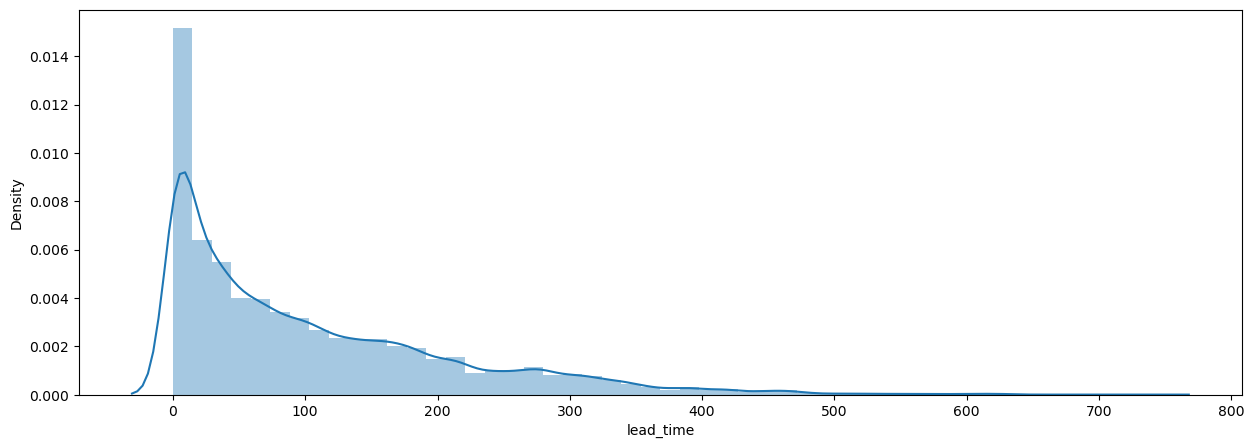

In [32]:
plt.figure(figsize=(15,5))
sns.distplot(df['lead_time'])
plt.show()

In [33]:
df['lead_time_group'] = df['lead_time'].apply(lambda value: 'A days' if value < 3 else ('A weeks' if value < 7 else ('A months' if value < 30 else ('Several months' if value < 180 else 'Several years'))))


In [34]:
df['lead_time_group'] = df['lead_time'].apply(lambda value: 'A days' if value < 3 else ('A weeks' if value < 7 else ('A months' if value < 30 else ('Several months' if value < 180 else 'Several years'))))
dfg_cancel = df[df['is_canceled'] == 1].groupby(['hotel','lead_time_group']).aggregate({'is_canceled' : 'count'}).reset_index()
dfg_aman = df[df['is_canceled'] == 0].groupby(['hotel','lead_time_group']).aggregate({'is_canceled' : 'count'}).reset_index()
dfg_cancel['cancel_ratio'] = dfg_cancel['is_canceled'] / (dfg_cancel['is_canceled'] + dfg_aman['is_canceled']) * 100
dfg_cancel

,hotel,lead_time_group,is_canceled,cancel_ratio
0,City Hotel,A days,619,10.301215
1,City Hotel,A months,3813,29.645467
2,City Hotel,A weeks,568,14.423565
3,City Hotel,Several months,17141,43.710315
4,City Hotel,Several years,10938,63.819359
5,Resort Hotel,A days,329,5.706852
6,Resort Hotel,A months,1399,20.713651
7,Resort Hotel,A weeks,197,7.594449
8,Resort Hotel,Several months,5951,34.756454
9,Resort Hotel,Several years,3244,41.525858


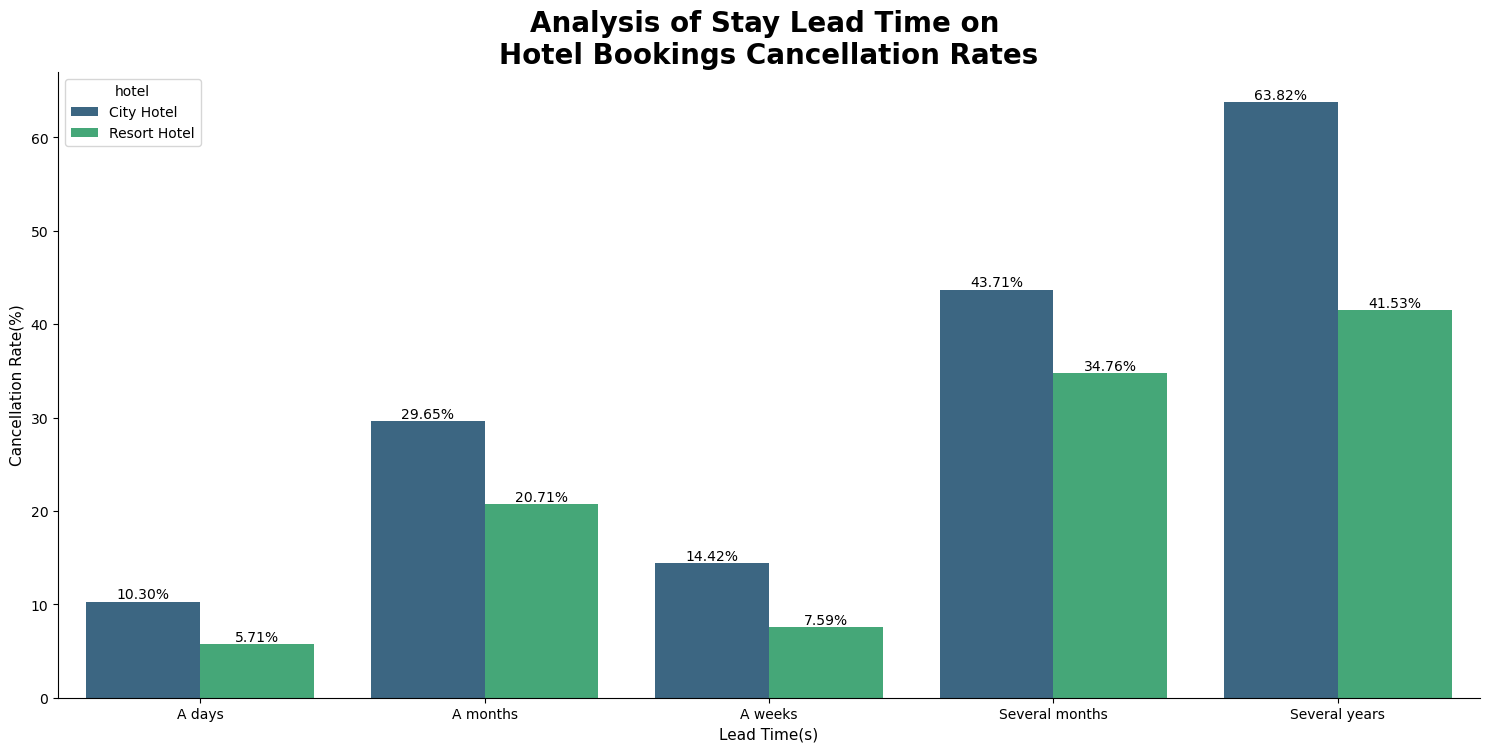

In [35]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='lead_time_group', y='cancel_ratio', hue='hotel', data=dfg_cancel, palette='viridis')

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

sns.despine()
plt.tight_layout()

# Menambahkan label pada setiap bar

plt.bar_label(ax.containers[0], fmt='%.2f%%')
plt.bar_label(ax.containers[1], fmt='%.2f%%')
plt.title('Analysis of Stay Lead Time on \nHotel Bookings Cancellation Rates', weight='bold', fontsize = 20)
plt.show()

Terlihat bahwa tingkat pembatalan cenderung meningkat seiring dengan peningkatan lead time.<br>
Artinya, semakin jauh hari kedatangan dari tanggal pemesanan, peluang pembatalan semakin tinggi.